<center><h1>Avhad_Deepa_HW8</h1></center>

Name: Deepa Avhad
<br>
Github Username: d-avhad
<br>
USC ID: 7023239026

References:

1. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html
3. https://scikit-learn.org/stable/modules/cross_validation.html
4. https://scikit-learn.org/stable/modules/svm.html
5. https://towardsdatascience.com/supervised-learning-algorithms-explanaition-and-simple-code-4fbd1276f8aa
6. http://www.cs.cmu.edu/~hanxiaol/slides/spectral_learning.pdf
7. https://www.dataquest.io/blog/learning-curves-machine-learning/

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['PYTHONWARNINGS'] = 'ignore'
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

In [2]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, auc, accuracy_score

In [3]:
from scipy.special import softmax

In [4]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import KNeighborsClassifier

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [5]:

# let diagnosis : 1= Malignant ; 0=benign

tmp = []
wdbc_df = pd.read_csv("../data/wdbc.csv", header=None)

for i in range(len(wdbc_df.columns)):
    if i == 0:
        tmp.append('id')
    elif i == 1:
        tmp.append('diagnosis_class')
    else:
        tmp.append(f'feature{i-1}')

wdbc_df.columns = tmp
wdbc_df.replace({'M': 1, 'B': 0}, inplace=True)
print("Whole Data:")
wdbc_df

Whole Data:


,id,diagnosis_class,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
print("Diagnosis Class")
print("1: Malignant")
print("0:Benign")
wdbc_df['diagnosis_class'].value_counts()

Diagnosis Class
1: Malignant
0:Benign


0    357
1    212
Name: diagnosis_class, dtype: int64

In [7]:
#function for dividing test and train data such that we have 20% of both the positve and negative classes as the test set

def create_train_test_split(data, random_state, test_size=0.2):
    
    np.random.seed(random_state)
    b_idx, = np.where(data['diagnosis_class'] == 0)
    b_test_num = round(len(b_idx) * test_size)
    b_test_idx = np.random.choice(b_idx, b_test_num, replace=False)
    m_idx, = np.where(data['diagnosis_class'] == 1)
    m_test_num = round(len(m_idx) * test_size)
    m_test_idx = np.random.choice(m_idx, m_test_num, replace=False)
    test_idx = np.concatenate([b_test_idx, m_test_idx])
    train_idx = np.array([i for i in range(data.shape[0]) if i not in test_idx])
    trainX = data.iloc[train_idx, 2:].copy()
    trainY = data.iloc[train_idx, 1].copy()
    testX = data.iloc[test_idx, 2:].copy()
    testY = data.iloc[test_idx, 1].copy()
    
    return trainX, testX, trainY, testY

In [8]:
x_train, x_test, y_train, y_test = create_train_test_split(wdbc_df, random_state=0)

In [9]:
x_train.index= np.arange(0, len(x_train))

x_test.index= np.arange(0, len(x_test))

y_train.index= np.arange(0, len(y_train))

y_test.index= np.arange(0, len(y_test))

In [10]:
x_train

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
2,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
3,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
4,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
452,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
453,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
454,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [11]:
y_train

0      1
1      1
2      1
3      1
4      1
      ..
451    1
452    1
453    1
454    1
455    0
Name: diagnosis_class, Length: 456, dtype: int64

In [12]:
x_test

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30
0,13.490,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.033840,0.1809,0.05718,...,15.15,31.82,99.00,698.8,0.1162,0.17110,0.228200,0.128200,0.2871,0.06917
1,12.580,18.40,79.83,489.0,0.08393,0.04216,0.00186,0.002924,0.1697,0.05855,...,13.50,23.08,85.56,564.1,0.1038,0.06624,0.005579,0.008772,0.2505,0.06431
2,14.870,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.049510,0.1487,0.05748,...,16.01,28.48,103.90,783.6,0.1216,0.13880,0.170000,0.101700,0.2369,0.06599
3,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.000000,0.1985,0.07098,...,10.17,22.80,64.01,317.0,0.1460,0.13100,0.000000,0.000000,0.2445,0.08865
4,11.710,17.19,74.68,420.3,0.09774,0.06141,0.03809,0.032390,0.1516,0.06095,...,13.01,21.39,84.42,521.5,0.1323,0.10400,0.152100,0.109900,0.2572,0.07097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,18.490,17.52,121.30,1068.0,0.10120,0.13170,0.14910,0.091830,0.1832,0.06697,...,22.75,22.88,146.40,1600.0,0.1412,0.30890,0.353300,0.166300,0.2510,0.09445
109,25.730,17.46,174.20,2010.0,0.11490,0.23630,0.33680,0.191300,0.1956,0.06121,...,33.13,23.58,229.30,3234.0,0.1530,0.59370,0.645100,0.275600,0.3690,0.08815
110,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.149600,0.2395,0.07398,...,26.68,33.48,176.50,2089.0,0.1491,0.75840,0.678000,0.290300,0.4098,0.12840
111,15.370,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.074830,0.1717,0.06097,...,16.43,25.84,107.50,830.9,0.1257,0.19970,0.284600,0.147600,0.2556,0.06828


In [13]:
y_test

0      0
1      0
2      0
3      0
4      0
      ..
108    1
109    1
110    1
111    1
112    1
Name: diagnosis_class, Length: 113, dtype: int64

In [14]:
y_train.value_counts()

0    286
1    170
Name: diagnosis_class, dtype: int64

In [15]:
print("using about 20% of both the positve and negative classes as the test set")
y_test.value_counts()

using about 20% of both the positve and negative classes as the test set


0    71
1    42
Name: diagnosis_class, dtype: int64

### (b) Monte-Carlo Simulation

In [16]:
def get_normalized_data(x_train, x_test):    
    normalizer = Normalizer()
    x_train_normalized = normalizer.fit_transform(x_train)
    x_test_normalized = normalizer.transform(x_test)        
    return pd.DataFrame(x_train_normalized), pd.DataFrame(x_test_normalized)

In [17]:
def calculate_accuracy_score(ground_truth, predicted_truth):
    calculated_accuracy_score = accuracy_score(ground_truth, predicted_truth)
    print(f'Accuracy Score is: {round(calculated_accuracy_score, 6)}')
    print("\n")

In [18]:
def calculate_confusion_matrix(ground_truth, predicted_truth):
    conf_matrix = confusion_matrix(ground_truth, predicted_truth)
    print(f'Confusion Matrix is: \n{conf_matrix}')
    print("\n")

In [19]:
def plot_roc_curve(actualY, predictedY_prob, title):
   
    fig, axes = plt.subplots(figsize=(12, 7))
    axes.set_title(f"ROC curve for {title}")
    fpr, tpr, thresholds = roc_curve(actualY, predictedY_prob, pos_label=1)
    roc_auc = auc(fpr, tpr)
    axes.plot(fpr, tpr, label=f"ROC Curve Area: {round(roc_auc, 6)}")
    axes.plot([0, 1], [0, 1], "--")
    axes.set_xlabel("False Positive Rate")
    axes.set_ylabel("True Positive Rate")
    axes.legend()
    plt.show()

In [20]:
def calculate_model_summary(ground_truth, predicted_truth, prob, title):
    print('-'*60)
    print(f"Model Summary for {title}")
    print('-'*60)
    print("ROC PLOT & CONFUSION MATRIX FOR LAST RUN")
    calculate_accuracy_score(ground_truth, predicted_truth)
    calculate_confusion_matrix(ground_truth, predicted_truth)
    plot_roc_curve(ground_truth, prob, title)

In [21]:
def evaluate_metrics(data_y, data_y_pred, data_y_pred_prob, data_report):
    
    fpr, tpr, thresholds = roc_curve(data_y, data_y_pred_prob, pos_label=1)
    
    return {
        'accuracy' : data_report['accuracy'],
        'precision' : data_report['weighted avg']['precision'],
        'recall' : data_report['weighted avg']['recall'],
        'F1-score' : data_report['weighted avg']['f1-score'],
        'AUC' : round(auc(fpr, tpr), 6)
    }


In [22]:
def predict_and_evaluate_model(clf, data_x, data_y):
    
    y_data_pred_prob = clf.decision_function(data_x)
    
    y_data_pred = clf.predict(data_x)
    
    data_report = classification_report(data_y, y_data_pred, output_dict=True)
    
    tmp_data_res = evaluate_metrics(data_y, y_data_pred, y_data_pred_prob, data_report)
    return {
        'tmp_data_res': tmp_data_res,
        'y_data_pred': y_data_pred,
        'y_data_pred_prob': y_data_pred_prob,
        
    }

In [23]:
def summarize_results(train_df, test_df):
    print('-'*60)
    print("Averaging all metrics")
    print('-'*60)
    train_resdf = train_df.apply(lambda x: x.mean(), axis=0)
    test_resdf = test_df.apply(lambda x: x.mean(), axis=0)
    data = [train_resdf, test_resdf]
    summary = pd.concat(data, axis=1)
    summary = summary.T
    summary = summary.set_index(pd.Series(['training', 'test']))
    print(summary)
    return summary

In [24]:
def algo_monte_carlo(data, itr,num,algo):
    
    metrics_cols = ['accuracy', 'precision', 'recall', 'F1-score', 'AUC']
    train_df = pd.DataFrame(columns=metrics_cols)
    test_df = pd.DataFrame(columns=metrics_cols)
    
    paramt = {'C' : np.logspace(-2, 7, num)}
    k_folds = 5
    
    kwargs = {
        'param_grid' : paramt, 
        'scoring' : 'f1_weighted',
        'n_jobs' : -1,
        'verbose' : 0
    }
       
    for i in range(itr):
        
        x_train, x_test, y_train, y_test = create_train_test_split(wdbc_df, random_state=i)
        
        x_train, x_test = get_normalized_data(x_train, x_test)
        
        if (algo == 'SUPER'):
            
            kwargs['cv'] = StratifiedKFold(k_folds, random_state=i, shuffle=True)
            clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False, max_iter=10000), **kwargs)
            clf.fit(x_train, y_train)
            
        elif (algo == 'SEMI-SUPER'):
            clf = algo_semi_supervised(x_train, y_train, kwargs)
            
        else:
            clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **kwargs)
            clf.fit(x_train, y_train)
            
        train_report = predict_and_evaluate_model(clf, x_train, y_train)
        
        test_report = predict_and_evaluate_model(clf, x_test, y_test)
        
        train_df = train_df.append(train_report['tmp_data_res'], ignore_index=True)
        
        test_df = test_df.append(test_report['tmp_data_res'], ignore_index=True)
        
        train_accuracy = train_report['tmp_data_res']['accuracy']
        
        test_accuracy = test_report['tmp_data_res']['accuracy']
        
        print(f'Iteration: {i + 1} | Training Accuracy: {round(train_accuracy, 6)} | Testing Accuracy: {round(test_accuracy, 6)}')
        print(f'Best parameter setting: {clf.best_params_}\n')
        
    calculate_model_summary(y_train, train_report['y_data_pred'], train_report['y_data_pred_prob'], "Training")
    calculate_model_summary(y_test, test_report['y_data_pred'], test_report['y_data_pred_prob'], "Testing")
    summary = summarize_results(train_df, test_df)
    return summary

#### (i) Supervised Learning

----------------FOR SUPERVISED LEAARNING-------------------------
Iteration: 1 | Training Accuracy: 0.997807 | Testing Accuracy: 0.955752
Best parameter setting: {'C': 42813.32398719387}

Iteration: 2 | Training Accuracy: 0.975877 | Testing Accuracy: 0.955752
Best parameter setting: {'C': 1623.776739188721}

Iteration: 3 | Training Accuracy: 0.969298 | Testing Accuracy: 0.929204
Best parameter setting: {'C': 183.29807108324337}

Iteration: 4 | Training Accuracy: 0.982456 | Testing Accuracy: 0.946903
Best parameter setting: {'C': 4832.930238571752}

Iteration: 5 | Training Accuracy: 0.997807 | Testing Accuracy: 0.938053
Best parameter setting: {'C': 42813.32398719387}

Iteration: 6 | Training Accuracy: 0.986842 | Testing Accuracy: 0.946903
Best parameter setting: {'C': 42813.32398719387}

Iteration: 7 | Training Accuracy: 0.982456 | Testing Accuracy: 0.973451
Best parameter setting: {'C': 14384.498882876629}

Iteration: 8 | Training Accuracy: 0.993421 | Testing Accuracy: 0.938053
Best p

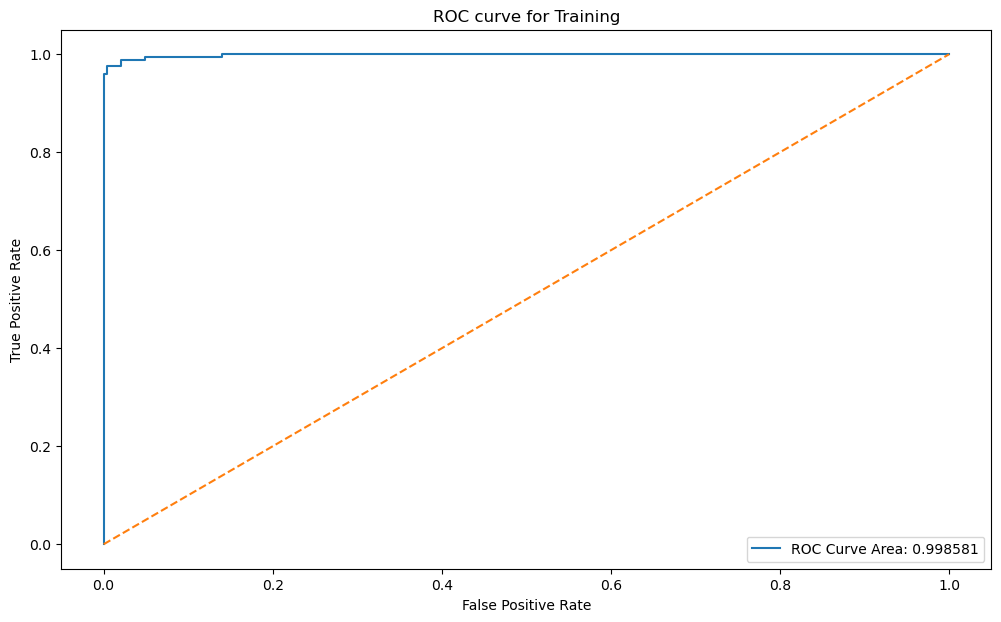

------------------------------------------------------------
Model Summary for Testing
------------------------------------------------------------
ROC PLOT & CONFUSION MATRIX FOR LAST RUN
Accuracy Score is: 0.920354


Confusion Matrix is: 
[[69  2]
 [ 7 35]]




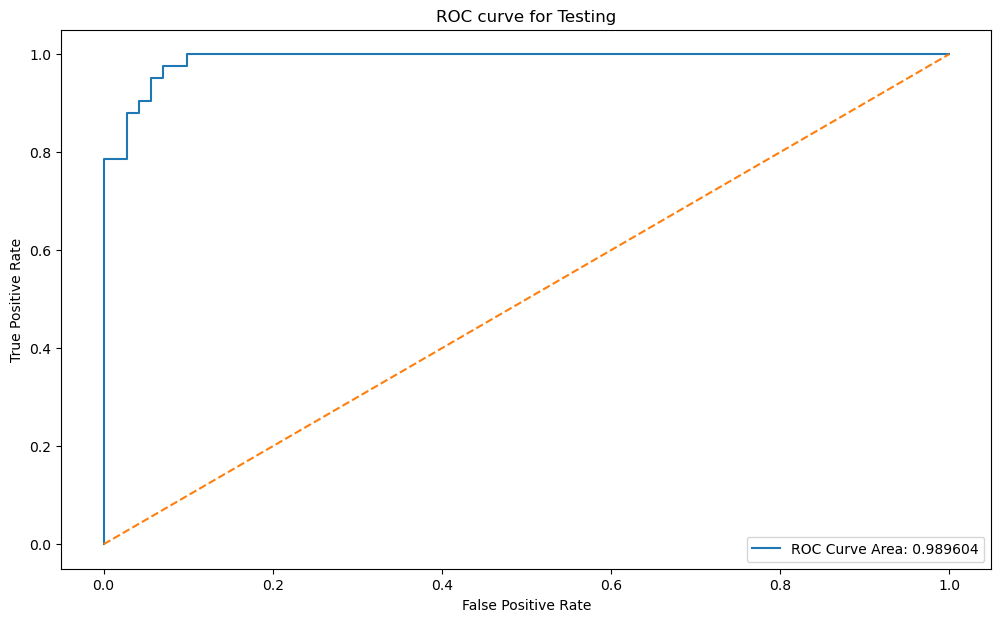

------------------------------------------------------------
Averaging all metrics
------------------------------------------------------------
          accuracy  precision    recall  F1-score       AUC
training  0.985819   0.985851  0.985819  0.985808  0.998722
test      0.956047   0.956747  0.956047  0.955984  0.987246

AVERAGE RESULTS FOR SUPERVISED LEARNING:


,accuracy,precision,recall,F1-score,AUC
training,0.985819,0.985851,0.985819,0.985808,0.998722
test,0.956047,0.956747,0.956047,0.955984,0.987246


In [25]:
#for supervised learning
#M=30
summary={}
print("----------------FOR SUPERVISED LEAARNING-------------------------")
algo = 'SUPER'
summary['Supervized L1 SVM'] = algo_monte_carlo(wdbc_df, 30, 20,algo)
df = pd.DataFrame(summary['Supervized L1 SVM'])
print("\nAVERAGE RESULTS FOR SUPERVISED LEARNING:")
df

#### (ii) Semi-Supervised Learning/ Self-training

#####  (A)

In [26]:
def algo_semi_supervised(trainX, trainY, args):
    labeled_idx = []
    unlabeled_idx = []
    
    # Selecting  50% of the positive class along with 50% of the negative class in the training set as labeled
    # data and the rest as unlabelled data. selecting  them randomly.
    
    for c in [0, 1]:
        c_idx, = np.where(trainY == c)
        idx_num = round(len(c_idx) * 0.5)
        select_idx = np.random.choice(c_idx, idx_num, replace=False)
        labeled_idx.extend(select_idx)
    
    for i in range(len(trainX)):
        if i not in labeled_idx:
            unlabeled_idx.append(i)

    labeledX = trainX.iloc[labeled_idx].to_numpy().tolist()
    labeledY = trainY.iloc[labeled_idx].to_numpy().tolist()
    unlabeledX = trainX.iloc[unlabeled_idx].to_numpy().tolist()
    unlabeledY = trainY.iloc[unlabeled_idx].to_numpy().tolist()
    
    #Training  an L1-penalized SVM to classify the labeled data, using normalized data.
    # using k fold= 5 fold cross validation. (passed from above function)
    #------Part A------------------------
    
    clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **args)
    clf.fit(labeledX, labeledY)
    
    
    #---------------part B---------------
#SVM labeling  unlabeled data,& adding  it to the labeled data


    while len(unlabeledX) > 0:
        scores = clf.decision_function(unlabeledX)
        
        # sorting to find the unlabeled data point that is the farthest to the decision boundary of the SVM.
        sorted_idx = sorted([i for i in range(len(unlabeledX))], 
                            key=lambda x : abs(scores[x]))
        
        unlabeledX = [unlabeledX[i] for i in sorted_idx]
        unlabeledY = [unlabeledY[i] for i in sorted_idx]
        
        labeledX.append(unlabeledX.pop())
        labeledY.append(unlabeledY.pop())
        
        # retraining  the SVM. Continuing  this process until all unlabeled data are used.
        clf.best_estimator_.fit(labeledX, labeledY)
    
    return clf

##### (B)

SEMI SUPERVISED LEARNING
Iteration: 1 | Training Accuracy: 0.995614 | Testing Accuracy: 0.973451
Best parameter setting: {'C': 10000000.0}

Iteration: 2 | Training Accuracy: 0.97807 | Testing Accuracy: 0.973451
Best parameter setting: {'C': 10000.0}

Iteration: 3 | Training Accuracy: 0.989035 | Testing Accuracy: 0.946903
Best parameter setting: {'C': 10000.0}

Iteration: 4 | Training Accuracy: 0.995614 | Testing Accuracy: 0.964602
Best parameter setting: {'C': 100000.0}

Iteration: 5 | Training Accuracy: 0.989035 | Testing Accuracy: 0.964602
Best parameter setting: {'C': 10000.0}

Iteration: 6 | Training Accuracy: 0.984649 | Testing Accuracy: 0.946903
Best parameter setting: {'C': 10000.0}

Iteration: 7 | Training Accuracy: 0.97807 | Testing Accuracy: 0.964602
Best parameter setting: {'C': 100000.0}

Iteration: 8 | Training Accuracy: 0.989035 | Testing Accuracy: 0.955752
Best parameter setting: {'C': 1000000.0}

Iteration: 9 | Training Accuracy: 0.986842 | Testing Accuracy: 0.964602
Be

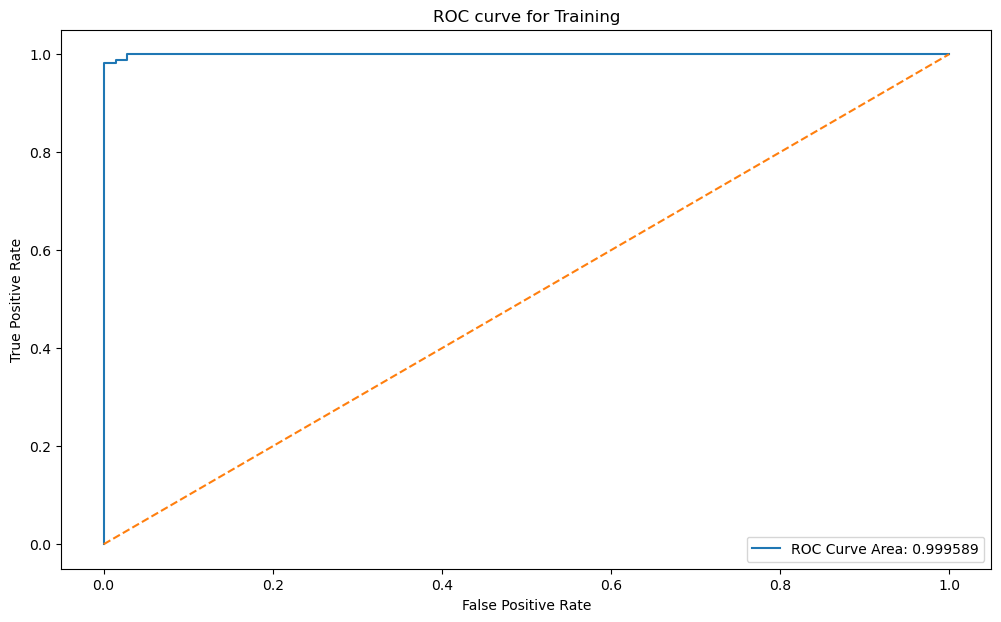

------------------------------------------------------------
Model Summary for Testing
------------------------------------------------------------
ROC PLOT & CONFUSION MATRIX FOR LAST RUN
Accuracy Score is: 0.938053


Confusion Matrix is: 
[[69  2]
 [ 5 37]]




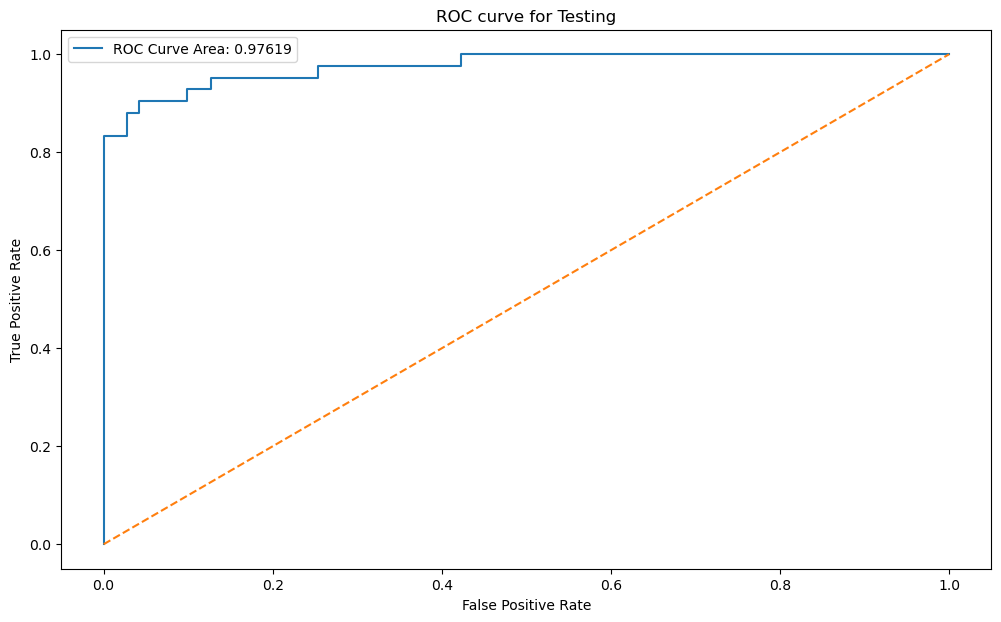

------------------------------------------------------------
Averaging all metrics
------------------------------------------------------------
          accuracy  precision    recall  F1-score       AUC
training  0.983406   0.983425  0.983406  0.983384  0.998645
test      0.958702   0.959159  0.958702  0.958556  0.987525
AVERAGE RESULTS:


,accuracy,precision,recall,F1-score,AUC
training,0.983406,0.983425,0.983406,0.983384,0.998645
test,0.958702,0.959159,0.958702,0.958556,0.987525


In [27]:
print("SEMI SUPERVISED LEARNING")
algo = 'SEMI-SUPER'
summary['Semi-Supervized L1 SVM'] = algo_monte_carlo(wdbc_df, 30,10, algo)
df = pd.DataFrame(summary['Semi-Supervized L1 SVM'])
print("AVERAGE RESULTS:")
df

#### (iii) Unsupervised Learning

#####  part (A) , (B)  & (C)  combined

We can set the number of iterations so that we can avoid being trapped in a local minimum.

In [28]:
# function to get the distances from cluster center and pass them through a softmax to calculate probabilities

def cal_dist_prob(centers, X, cluster_label):
    
    dist = np.ndarray((X.shape[0],))
    proba = np.ndarray((X.shape[0], 2))
    for i, x in enumerate(X):
        center = centers[cluster_label[i]]
        dist[i] = np.linalg.norm(x - center)
        proba[i, 0] = np.linalg.norm(x - centers[0])
        proba[i, 1] = np.linalg.norm(x - centers[1])
    
    proba = softmax(proba, axis=1).astype(np.float64)
    return dist, proba

In [29]:
# function for for majority polling

def get_majority(X, cluster_label, dist, Y):
    label2cluster = np.ndarray((2,), dtype='int')
    major_label = cluster_label.copy()
    for cluster in [0, 1]:
        sample_idx, = np.where(cluster_label == cluster)
        top30 = sorted(sample_idx.tolist(), key=lambda i : dist[i])[:30]
        majority = Y.iloc[top30].value_counts().index[0]
        major_label[sample_idx] = majority
        label2cluster[majority] = cluster
    return label2cluster, major_label

In [30]:
def predict_and_evaluate_model_v2(dataY, dataPredY, dataPredY_prob):
    dataReport = classification_report(dataY, dataPredY, output_dict=True)
    tmp_data_res = evaluate_metrics(dataY, dataPredY, dataPredY_prob, dataReport)
    return {
        'data_report': dataReport,
        'tmp_data_res': tmp_data_res,
        'y_data_pred': dataPredY,
        'y_data_pred_prob': dataPredY_prob,
    }

In [31]:
def splitData(data, random_state, test_size=0.2):
    np.random.seed(random_state)
    b_idx, = np.where(data['diagnosis_class'] == 0)
    b_test_num = round(len(b_idx) * test_size)
    b_test_idx = np.random.choice(b_idx, b_test_num, replace=False)
    m_idx, = np.where(data['diagnosis_class'] == 1)
    m_test_num = round(len(m_idx) * test_size)
    m_test_idx = np.random.choice(m_idx, m_test_num, replace=False)
    test_idx = np.concatenate([b_test_idx, m_test_idx])
    train_idx = np.array([i for i in range(data.shape[0]) if i not in test_idx])
    trainX = data.iloc[train_idx, 2:].copy()
    trainY = data.iloc[train_idx, 1].copy()
    testX = data.iloc[test_idx, 2:].copy()
    testY = data.iloc[test_idx, 1].copy()
    
    return trainX, trainY, testX, testY

In [32]:
def normalizeData(trainX, testX):
    scaler = Normalizer()
    norm_trainX = scaler.fit_transform(trainX)
    norm_testX = scaler.transform(testX)
    return norm_trainX, norm_testX

In [33]:
def evalMetrics(ground_truth, predict, prob, report):
    acc = report['accuracy']
    fpr, tpr, thresholds = roc_curve(ground_truth, prob, pos_label=1)
    roc_auc = round(auc(fpr, tpr), 4)
    return {
        'acc' : acc,
        'precision' : report['weighted avg']['precision'],
        'recall' : report['weighted avg']['recall'],
        'f1-score' : report['weighted avg']['f1-score'],
        'auc' : roc_auc
    }

In [34]:

def monte_carlo_kmeans_spectral(data, n, algo):
    print ('=' * 60)
    print (f'Running method for {algo}')
    print ('=' * 60)
    
    cols = ['acc', 'precision', 'recall', 'f1-score', 'auc']
    train_resdf = pd.DataFrame(columns=cols)
    test_resdf = pd.DataFrame(columns=cols)
    
    #-----------Part A: runinng k means multiple times----------------------------------
    for i in range(n):
        trainX, trainY, testX, testY = splitData(data, random_state=i, test_size=0.2)
        trainX, testX = normalizeData(trainX, testX)
        
        
        #part A
        if algo == 'Unsupervised-KMeans':
            clusterer = KMeans(n_clusters=2, n_init = 15, random_state=i).fit(trainX)

            # training
            train_cluster_label = clusterer.predict(trainX)
            
            #---Part B : Compute the centers of the two clusters and find the closest 30 data points to each center--
            dist, trainPredY_prob = cal_dist_prob(clusterer.cluster_centers_, trainX, train_cluster_label)
            label2cluster, trainPredY = get_majority(trainX, train_cluster_label, dist, trainY)
         
        #part iv
        elif algo == 'Unsupervised-Spectral':
            cluster_label = SpectralClustering(n_clusters=2, 
                                               assign_labels='kmeans', 
                                               affinity='rbf', 
                                               eigen_tol = 1e-2, 
                                               eigen_solver = 'arpack', 
                                               random_state=0).fit_predict(trainX)    # default gamma=1.0 ; using fit_predict
    
            cluster_centers = []
            for clus in [0,1]:
                cluster_centers.append(np.mean(trainX[cluster_label==clus], axis = 0).tolist())

            # build a KNN classifier
            knn = KNeighborsClassifier(n_neighbors=1)
            knn.fit(trainX, cluster_label)
            
            # training
            train_cluster_label = knn.predict(trainX)
            dist, trainPredY_prob = cal_dist_prob(cluster_centers, trainX, train_cluster_label)
            
            label2cluster, trainPredY = get_majority(trainX, train_cluster_label, dist, trainY)
        
        
        #part B-- for training data
        pos_cluster = label2cluster[0]
        trainPredY_prob = trainPredY_prob[:, pos_cluster]
        trainReport = classification_report(trainY, trainPredY, output_dict=True)
        tmp_train_res = evalMetrics(trainY, trainPredY, trainPredY_prob, trainReport)
        train_resdf = train_resdf.append(tmp_train_res, ignore_index=True)
        
        # part c test data
        if algo == 'Unsupervised-KMeans':
            test_cluster_label = clusterer.predict(testX)
            dist, testPredY_prob = cal_dist_prob(clusterer.cluster_centers_, testX, test_cluster_label)
        elif algo == 'Unsupervised-Spectral':
            test_cluster_label = knn.predict(testX)
            dist, testPredY_prob = cal_dist_prob(cluster_centers, testX, test_cluster_label)
            
        
        label2cluster, testPredY = get_majority(testX, test_cluster_label, dist, testY)
        pos_cluster = label2cluster[0]
        testPredY_prob = testPredY_prob[:, pos_cluster]
        testReport = classification_report(testY, testPredY, output_dict=True)
        tmp_test_res = evalMetrics(testY, testPredY, testPredY_prob, testReport)
        test_resdf = test_resdf.append(tmp_test_res, ignore_index=True)
        
        train_accuracy = trainReport['accuracy']
        test_accuracy = testReport['accuracy']
        print(f'Iteration: {i + 1} | Training Accuracy: {round(train_accuracy, 4)} | Testing Accuracy: {round(test_accuracy, 4)}')
    
    print('-' * 80)
    print('\nDetail report of 30th run of Monte-Calo\n')
    
    calculate_model_summary(trainY, trainPredY, trainPredY_prob, 'Training')
    calculate_model_summary(testY, testPredY, testPredY_prob, 'Test')
    
    summary = summarize_results(train_resdf, test_resdf)
    return summary

Running method for Unsupervised-KMeans
Iteration: 1 | Training Accuracy: 0.8882 | Testing Accuracy: 0.8761
Iteration: 2 | Training Accuracy: 0.8706 | Testing Accuracy: 0.9558
Iteration: 3 | Training Accuracy: 0.8969 | Testing Accuracy: 0.8496
Iteration: 4 | Training Accuracy: 0.886 | Testing Accuracy: 0.9115
Iteration: 5 | Training Accuracy: 0.8991 | Testing Accuracy: 0.8761
Iteration: 6 | Training Accuracy: 0.886 | Testing Accuracy: 0.8673
Iteration: 7 | Training Accuracy: 0.8794 | Testing Accuracy: 0.8938
Iteration: 8 | Training Accuracy: 0.886 | Testing Accuracy: 0.8673
Iteration: 9 | Training Accuracy: 0.8882 | Testing Accuracy: 0.8584
Iteration: 10 | Training Accuracy: 0.8794 | Testing Accuracy: 0.8938
Iteration: 11 | Training Accuracy: 0.8925 | Testing Accuracy: 0.8761
Iteration: 12 | Training Accuracy: 0.8794 | Testing Accuracy: 0.9115
Iteration: 13 | Training Accuracy: 0.8816 | Testing Accuracy: 0.9027
Iteration: 14 | Training Accuracy: 0.8882 | Testing Accuracy: 0.8938
Iterati

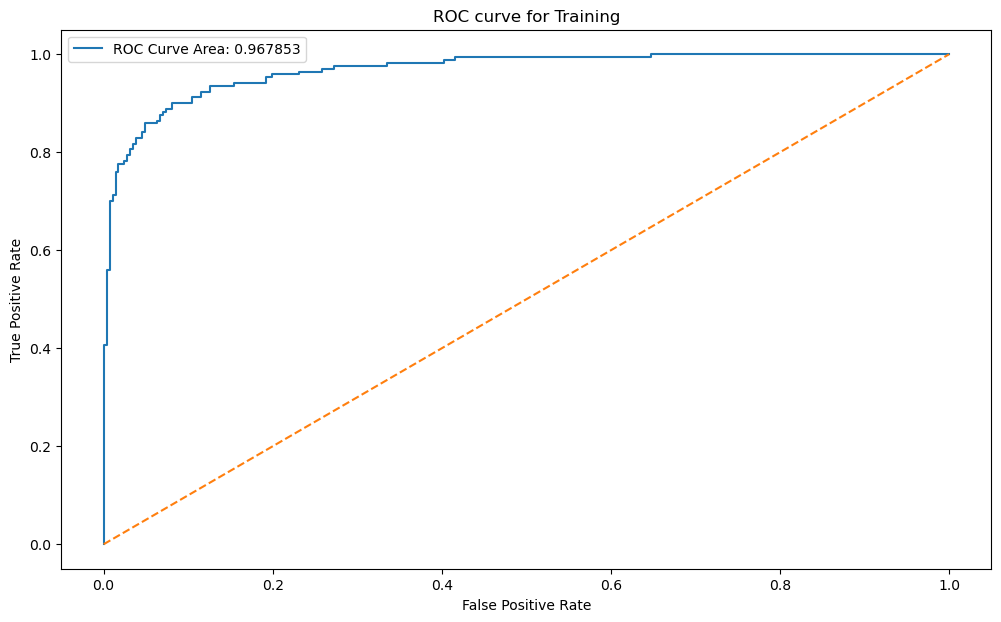

------------------------------------------------------------
Model Summary for Test
------------------------------------------------------------
ROC PLOT & CONFUSION MATRIX FOR LAST RUN
Accuracy Score is: 0.840708


Confusion Matrix is: 
[[70  1]
 [17 25]]




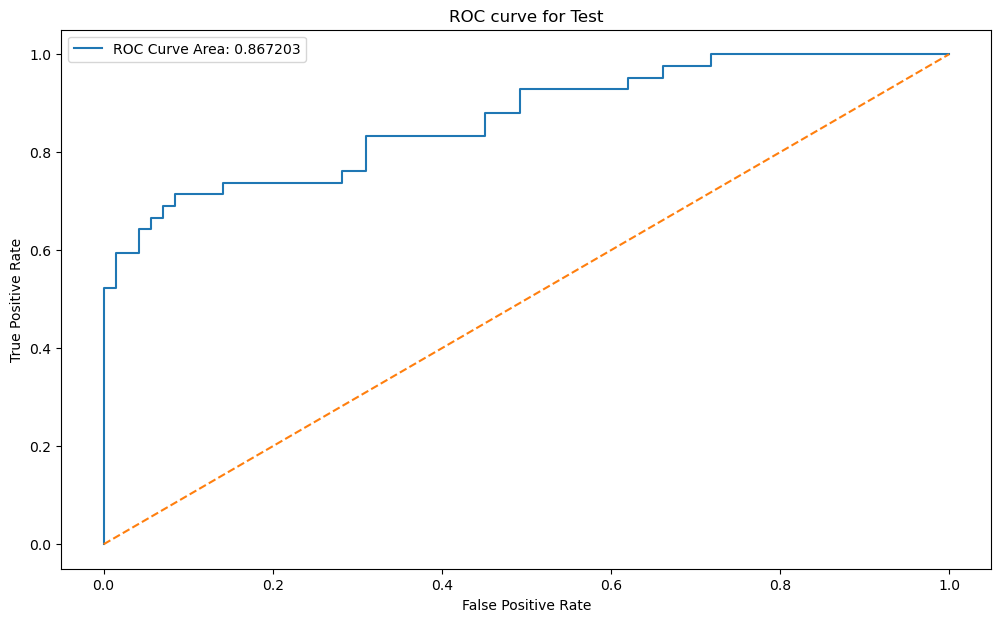

------------------------------------------------------------
Averaging all metrics
------------------------------------------------------------
               acc  precision    recall  f1-score       auc
training  0.887792   0.896542  0.887792  0.883912  0.950717
test      0.882301   0.894138  0.882301  0.877143  0.945860


,acc,precision,recall,f1-score,auc
training,0.887792,0.896542,0.887792,0.883912,0.950717
test,0.882301,0.894138,0.882301,0.877143,0.945860


In [35]:
algo = 'Unsupervised-KMeans'
wdbc_data=wdbc_df
summary['Unsupervised KMeans'] = monte_carlo_kmeans_spectral(wdbc_df, 30, algo)
df = pd.DataFrame(summary['Unsupervised KMeans'])
df

#### (iv) Spectral Clustering

Running method for Unsupervised-Spectral
Iteration: 1 | Training Accuracy: 0.886 | Testing Accuracy: 0.885
Iteration: 2 | Training Accuracy: 0.8684 | Testing Accuracy: 0.9204
Iteration: 3 | Training Accuracy: 0.8925 | Testing Accuracy: 0.8407
Iteration: 4 | Training Accuracy: 0.8794 | Testing Accuracy: 0.8761
Iteration: 5 | Training Accuracy: 0.8838 | Testing Accuracy: 0.8761
Iteration: 6 | Training Accuracy: 0.8838 | Testing Accuracy: 0.8761
Iteration: 7 | Training Accuracy: 0.8728 | Testing Accuracy: 0.8938
Iteration: 8 | Training Accuracy: 0.8838 | Testing Accuracy: 0.8496
Iteration: 9 | Training Accuracy: 0.886 | Testing Accuracy: 0.8496
Iteration: 10 | Training Accuracy: 0.8772 | Testing Accuracy: 0.8761
Iteration: 11 | Training Accuracy: 0.8904 | Testing Accuracy: 0.8496
Iteration: 12 | Training Accuracy: 0.8794 | Testing Accuracy: 0.8938
Iteration: 13 | Training Accuracy: 0.8794 | Testing Accuracy: 0.8938
Iteration: 14 | Training Accuracy: 0.8794 | Testing Accuracy: 0.885
Iterat

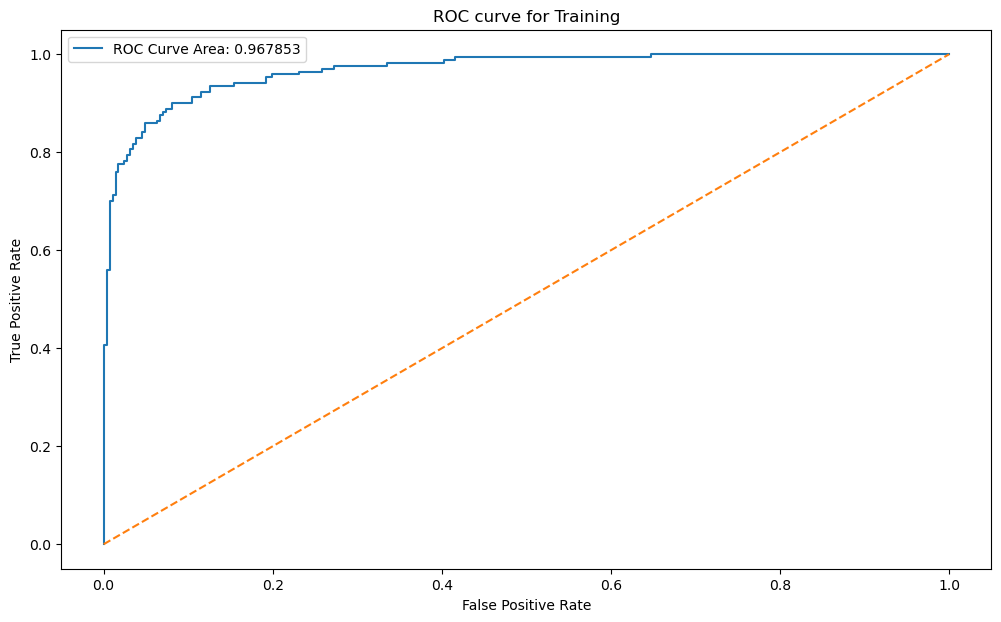

------------------------------------------------------------
Model Summary for Test
------------------------------------------------------------
ROC PLOT & CONFUSION MATRIX FOR LAST RUN
Accuracy Score is: 0.823009


Confusion Matrix is: 
[[69  2]
 [18 24]]




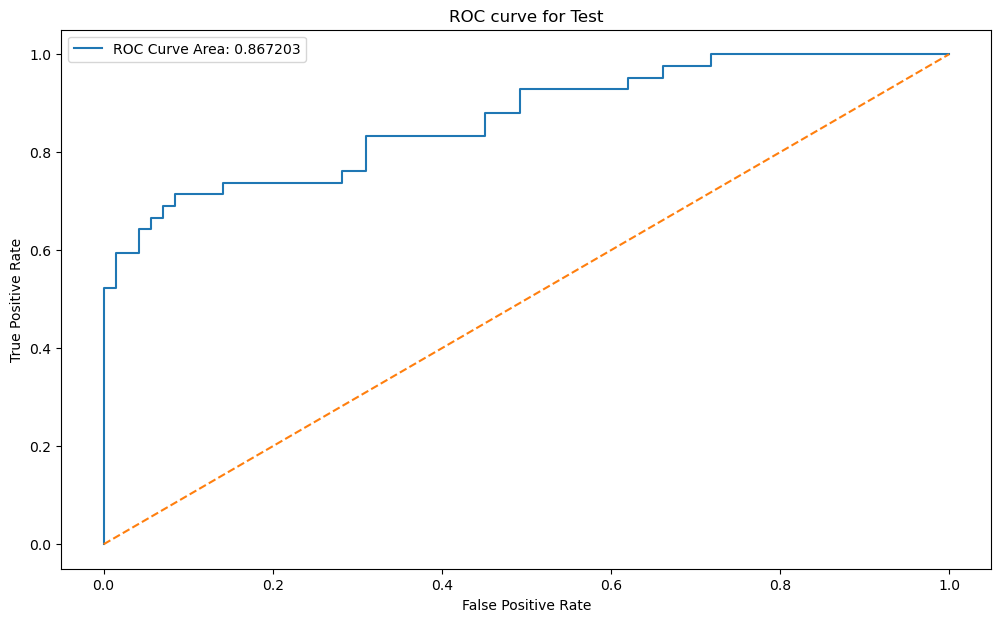

------------------------------------------------------------
Averaging all metrics
------------------------------------------------------------
               acc  precision    recall  f1-score       auc
training  0.882895   0.893003  0.882895  0.878464  0.950147
test      0.871681   0.885106  0.871681  0.865377  0.945257


,acc,precision,recall,f1-score,auc
training,0.882895,0.893003,0.882895,0.878464,0.950147
test,0.871681,0.885106,0.871681,0.865377,0.945257


In [36]:
algo = 'Unsupervised-Spectral'
summary['Unsupervised-Spectral'] = monte_carlo_kmeans_spectral(wdbc_data, 30, algo)
df = pd.DataFrame(summary['Unsupervised-Spectral'])
df

#### (v) Compare

In [37]:
def compare():
    for s in summary.keys():
        print('\n')
        print('='*60)
        print(s)
        print('='*60)
        print(summary[s])

In [38]:
compare()




Supervized L1 SVM
          accuracy  precision    recall  F1-score       AUC
training  0.985819   0.985851  0.985819  0.985808  0.998722
test      0.956047   0.956747  0.956047  0.955984  0.987246


Semi-Supervized L1 SVM
          accuracy  precision    recall  F1-score       AUC
training  0.983406   0.983425  0.983406  0.983384  0.998645
test      0.958702   0.959159  0.958702  0.958556  0.987525


Unsupervised KMeans
               acc  precision    recall  f1-score       auc
training  0.887792   0.896542  0.887792  0.883912  0.950717
test      0.882301   0.894138  0.882301  0.877143  0.945860


Unsupervised-Spectral
               acc  precision    recall  f1-score       auc
training  0.882895   0.893003  0.882895  0.878464  0.950147
test      0.871681   0.885106  0.871681  0.865377  0.945257


<font color='blue'>
    
Looking at the results above, we can deduce that for this dataset, Supervised learning  performs slightly better than Semi-Supervised which in turn performs significantly better than Unsupervised learning.<br>

This is because the supervised algorithm already has more information of labels as  a guidance to make the prediction where as semi-supervised has less. Unsupervised on the other hand makes predictions based on the similarity of features and hence does not perform as good as either the supervised or the semi-supervised.<br>

Therfore we can say that, generally if a large amount of labeled data is available, supervised learning is likely to perform the best, followed by semi-supervised learning with a smaller labeled dataset, and finally unsupervised learning.
However, if labeled data is scarce or expensive to obtain, semi-supervised or unsupervised learning may be the only viable options.
</font>

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

In [39]:

banknote_data = pd.read_csv("../data/data_banknote_authentication.txt", header=None)
banknote_data.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
banknote_data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [40]:
banknote_data['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [41]:
X = banknote_data.drop('class', axis=1)
y=banknote_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=472, random_state=42)


In [42]:
print("900 instances Training set features")
X_train

900 instances Training set features


,variance,skewness,curtosis,entropy
855,-1.8782,-6.58650,4.84860,-0.021566
622,5.0429,-0.52974,0.50439,1.106000
969,-2.1786,-6.44790,6.03440,-0.207770
947,-1.6820,-6.81210,7.13980,1.332300
1199,-2.9138,-9.47110,9.76680,-0.602160
...,...,...,...,...
1095,1.1640,3.91300,-4.55440,-3.867200
1130,-2.2918,-7.25700,7.95970,0.921100
1294,-7.0364,9.29310,0.16594,-4.539600
860,-3.4605,2.69010,0.16165,-1.022400


In [43]:
print("900 instances Training set class label")
y_train

900 instances Training set class label


855     1
622     0
969     1
947     1
1199    1
       ..
1095    1
1130    1
1294    1
860     1
1126    1
Name: class, Length: 900, dtype: int64

In [44]:
print("472 instances Testing set features")
X_test

472 instances Testing set features


,variance,skewness,curtosis,entropy
430,1.569100,6.3465,-0.18280,-2.409900
588,-0.278020,8.1881,-3.13380,-2.527600
296,0.051979,7.0521,-2.05410,-3.150800
184,-1.755900,11.9459,3.09460,-4.897800
244,2.428700,9.3821,-3.24770,-1.454300
...,...,...,...,...
1272,-4.233300,4.9166,-0.49212,-5.320700
865,-0.779950,3.2322,-3.28200,-3.100400
478,-1.778100,0.8546,7.13030,0.027572
793,-2.286000,-5.4484,5.80390,0.882310


In [45]:
print("472 instances Testing set class label")
y_test

472 instances Testing set class label


430     0
588     0
296     0
184     0
244     0
       ..
1272    1
865     1
478     0
793     1
1193    1
Name: class, Length: 472, dtype: int64

In [46]:
#normalize the data 
trainX, testX = get_normalized_data(X_train, X_test)
    

### (b) Repeat each of the following two procedures 50 times

In [47]:
def passive_function(trainX, trainY, testX, testY, settings):
    used_idx = []
    acc_list = []
    touse_idx = np.arange(trainX.shape[0])
     
#Training a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty.
    while len(touse_idx) > 0:
        np.random.shuffle(touse_idx)
        pool, touse_idx = touse_idx[:10], touse_idx[10:]
        used_idx.extend(pool)
        
        used_trainX, used_trainY = trainX.iloc[used_idx], trainY.iloc[used_idx]
        
        clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **settings)
        
        clf.fit(used_trainX, used_trainY)
        
        testPredY = clf.predict(testX)
        testReport = classification_report(testY, testPredY, output_dict=True)
        acc_list.append(testReport['accuracy'])
    
    return acc_list


In [48]:
def active_function(trainX, trainY, testX, testY, settings):
    
    touse_idx = np.arange(trainX.shape[0])
    used_idx = []
    acc_list = []
    
    np.random.shuffle(touse_idx)
    pool, touse_idx = touse_idx[:10], touse_idx[10:]
    used_idx.extend(pool)
    
    while len(used_idx) <= 900:
        used_trainX, used_trainY = trainX.iloc[used_idx], trainY.iloc[used_idx]
        
        clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **settings)
        clf.fit(used_trainX, used_trainY)
        
        testPredY = clf.predict(testX)
        testReport = classification_report(testY, testPredY, output_dict=True)
        acc_list.append(testReport['accuracy'])
        
        if len(touse_idx) == 0:
            break
        
        dist = clf.decision_function(trainX.iloc[touse_idx])
        sortedarg = np.arange(len(touse_idx))
        sorted(sortedarg, key=lambda i : abs(dist[i]))
        touse_idx = touse_idx[sortedarg]
        #. Choosing the 10 closest data points in the training set to the hyperplane of the SVM
        pool, touse_idx = touse_idx[:10], touse_idx[10:]
        used_idx.extend(pool)
        
    return acc_list


In [49]:
def helper_func(n, algo):
    
    tuned_params = {'C' : np.logspace(-2, 7, 20)}
    
    kwargs = {
        'param_grid' : tuned_params, 
        'scoring' : 'f1_weighted',
        'n_jobs' : -1,
        'verbose' : 0
    }
    
    learning_curve = []
    
    for i in range(n):
        
        kwargs['cv'] = StratifiedKFold(5, random_state=i, shuffle=True)
        
        if (algo == 'passive'):            
            # passive learning
            accuracy_list = passive_function(trainX,y_train, testX,y_test, kwargs)
            learning_curve.append(accuracy_list)
            
        elif (algo == 'active'):
            # active learning
            accuracy_list = active_function(trainX, y_train, testX, y_test, kwargs)
            learning_curve.append(accuracy_list)
        
        print(f"\n-------------------------Iteration {i + 1}-----------------------------------")
        k=1
        print("List of SVM Test Accuracy (for 90 SVM)")
        for i in accuracy_list:
            print(round(i,4), end=",")
    
        
    learning_curve = np.array(learning_curve)
    learning_curve = np.mean(learning_curve, axis=0)
    return learning_curve

#### (i) Passive

In [50]:
itrs = 50

passive_learning_curve = helper_func(itrs, 'passive')


-------------------------Iteration 1-----------------------------------
List of SVM Test Accuracy (for 90 SVM)
0.8686,0.9767,0.9788,0.9831,0.9873,0.9746,0.9809,0.9788,0.9852,0.9852,0.9746,0.9873,0.9852,0.9852,0.9852,0.9894,0.9894,0.9894,0.9894,0.9852,0.9852,0.9894,0.9852,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9915,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9958,0.9936,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9936,0.9958,0.9958,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9958,0.9936,0.9915,0.9915,0.9958,0.9958,0.9958,0.9915,0.9915,0.9915,0.9915,
-------------------------Iteration 2-----------------------------------
List of SVM Test Accuracy (for 90 SVM)
0.822,0.8157,0.9915,0.9788,0.9852,0.9619,0.9915,0.9597,0.9915,0.9915,0.9767,0.9852,0.9852,0.9873,0.9831,0.9915,0.9852,0.9915,0.9852,0.9852,0.9894,

0.4364,0.9089,0.9237,0.9831,0.9788,0.9852,0.9788,0.9831,0.9831,0.9831,0.9831,0.9915,0.9894,0.9958,0.9936,0.9915,0.9936,0.9915,0.9936,0.9936,0.9915,0.9936,0.9915,0.9894,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9958,0.9915,0.9915,
-------------------------Iteration 13-----------------------------------
List of SVM Test Accuracy (for 90 SVM)
0.9725,0.9703,0.9788,0.9809,0.9746,0.9703,0.9703,0.9703,0.9703,0.9958,0.9958,0.9958,0.9915,0.9915,0.9915,0.9831,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9936,0.9915,0.9915,0.9894,0.9894,0.9936,0.9936,0.9915,0.9915,0.9936,0.991

0.8263,0.8263,0.8814,0.9725,0.9725,0.9831,0.9788,0.9915,0.9915,0.9703,0.9746,0.9831,0.9915,0.9767,0.9915,0.9894,0.9894,0.9894,0.9894,0.9894,0.9873,0.9873,0.9873,0.9873,0.9873,0.9873,0.9873,0.9894,0.9894,0.9894,0.9873,0.9873,0.9873,0.9915,0.9873,0.9915,0.9894,0.9915,0.9873,0.9915,0.9915,0.9958,0.9915,0.9915,0.9915,0.9958,0.9958,0.9958,0.9958,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9894,0.9958,0.9915,0.9894,0.9915,0.9915,0.9915,
-------------------------Iteration 24-----------------------------------
List of SVM Test Accuracy (for 90 SVM)
0.8284,0.964,0.9661,0.9661,0.9682,0.9661,0.9682,0.9661,0.9682,0.9682,0.9661,0.9682,0.9725,0.9725,0.9682,0.9788,0.9767,0.9767,0.9767,0.9831,0.9873,0.9894,0.9873,0.9873,0.9894,0.9894,0.9873,0.9873,0.9894,0.9873,0.9894,0.9873,0.9873,0.9852,0.9894,0.9894,0.9894

0.839,0.8792,0.875,0.9746,0.9682,0.9936,0.9936,0.9767,0.9746,0.9852,0.9852,0.9873,0.9936,0.9873,0.9873,0.9873,0.9873,0.9894,0.9894,0.9894,0.9894,0.9894,0.9894,0.9894,0.9894,0.9915,0.9894,0.9894,0.9894,0.9894,0.9894,0.9894,0.9894,0.9894,0.9894,0.9894,0.9894,0.9894,0.9915,0.9894,0.9894,0.9894,0.9915,0.9894,0.9894,0.9894,0.9915,0.9894,0.9894,0.9894,0.9894,0.9894,0.9894,0.9979,0.9979,0.9979,0.9979,0.9979,0.9979,0.9979,0.9958,0.9958,0.9979,0.9979,0.9979,0.9979,0.9958,0.9958,0.9979,0.9979,0.9979,0.9979,0.9979,0.9979,0.9979,0.9979,0.9936,0.9936,0.9958,0.9915,0.9936,0.9915,0.9936,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,
-------------------------Iteration 35-----------------------------------
List of SVM Test Accuracy (for 90 SVM)
0.8263,0.9661,0.964,0.9809,0.9703,0.9703,0.9788,0.9788,0.9958,0.9958,0.9894,0.9915,0.9915,0.9915,0.9894,0.9894,0.9958,0.9894,0.9894,0.9894,0.9894,0.9894,0.9894,0.9894,0.9894,0.9894,0.9894,0.9852,0.9852,0.9915,0.9894,0.9852,0.9979,0.9979,0.9979,0.9979,0.9979,0

0.9703,0.964,0.9831,0.9852,0.9852,0.9979,0.9915,0.9915,0.9958,0.9958,0.9831,0.9958,0.9958,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9958,0.9958,0.9915,0.9958,0.9915,0.9915,0.9915,0.9915,0.9958,0.9915,0.9958,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9958,0.9915,0.9915,0.9915,0.9958,0.9894,0.9936,0.9936,0.9936,0.9936,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9958,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,
-------------------------Iteration 46-----------------------------------
List of SVM Test Accuracy (for 90 SVM)
0.7097,0.9216,0.9301,0.9661,0.9703,0.9661,0.9936,0.9767,0.9936,0.9852,0.9915,0.9936,0.9958,0.9915,0.9958,0.9915,0.9936,0.9894,0.9936,0.9873,0.9873,0.9936,0.9915,0.9936,0.9915,0.9936,0.9936,0.9915,0.9894,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9958,0.9958

#### (ii) Active

In [51]:
itrs = 50
active_learning_curve = helper_func(itrs, 'active')


-------------------------Iteration 1-----------------------------------
List of SVM Test Accuracy (for 90 SVM)
0.9068,0.9153,0.9873,0.9597,0.964,0.9809,0.928,0.9894,0.9831,0.9894,0.9852,0.9831,0.9809,0.9809,0.9915,0.9894,0.9915,0.9894,0.9894,0.9894,0.9873,0.9936,0.9936,0.9915,0.9915,0.9894,0.9894,0.9894,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9915,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9915,0.9936,0.9936,0.9936,0.9936,0.9936,0.9915,0.9915,0.9915,0.9936,0.9958,0.9915,0.9894,0.9936,0.9915,0.9915,0.9915,0.9915,0.9915,0.9936,0.9894,0.9958,0.9915,0.9915,0.9958,0.9958,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,
-------------------------Iteration 2-----------------------------------
List of SVM Test Accuracy (for 90 SVM)
0.8263,0.8475,0.9534,0.9915,0.9915,0.9915,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9936,0.9915,0.9915,0.9936,0.9936,0.9936,0.9936,0

0.6314,0.8263,0.8919,0.9831,0.8983,0.9915,0.9894,0.9894,0.9873,0.9873,0.9915,0.9915,0.9894,0.9894,0.9894,0.9915,0.9958,0.9958,0.9873,0.9958,0.9936,0.9936,0.9936,0.9958,0.9958,0.9958,0.9958,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9958,0.9958,0.9958,0.9915,0.9958,0.9958,0.9958,0.9958,0.9936,0.9958,0.9936,0.9958,0.9958,0.9958,0.9958,0.9936,0.9936,0.9894,0.9915,0.9936,0.9894,0.9936,0.9936,0.9915,0.9936,0.9958,0.9915,0.9915,0.9958,0.9915,0.9958,0.9915,0.9915,0.9915,
-------------------------Iteration 13-----------------------------------
List of SVM Test Accuracy (for 90 SVM)
0.9174,0.9661,0.947,0.9619,0.9619,0.9725,0.9725,0.9725,0.9725,0.9703,0.9725,0.9725,0.9703,0.9725,0.9703,0.9852,0.9873,0.9894,0.9725,0.9915,0.9894,0.9873,0.9873,0.9809,0.9873,0.9873,0.9958,0.9958,0.9894,0.9894,0.9894,0.9915,0.9831,0.9873,0.9894,0.9894,0.9915

0.9746,0.9025,0.9513,0.9767,0.9788,0.9915,0.9809,0.9809,0.9894,0.9831,0.9873,0.9873,0.9831,0.9831,0.9831,0.9831,0.9831,0.9809,0.9894,0.9831,0.9894,0.9873,0.9894,0.9873,0.9873,0.9873,0.9873,0.9894,0.9873,0.9873,0.9873,0.9894,0.9873,0.9894,0.9873,0.9873,0.9873,0.9915,0.9873,0.9873,0.9894,0.9894,0.9894,0.9894,0.9894,0.9894,0.9894,0.9894,0.9894,0.9894,0.9958,0.9894,0.9894,0.9894,0.9894,0.9894,0.9894,0.9894,0.9894,0.9894,0.9894,0.9894,0.9915,0.9894,0.9894,0.9915,0.9915,0.9894,0.9894,0.9894,0.9894,0.9915,0.9936,0.9936,0.9915,0.9894,0.9894,0.9915,0.9915,0.9915,0.9936,0.9936,0.9894,0.9936,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,
-------------------------Iteration 24-----------------------------------
List of SVM Test Accuracy (for 90 SVM)
0.7881,0.8941,0.9661,0.9725,0.9703,0.9661,0.9682,0.9661,0.9703,0.9767,0.9809,0.9873,0.9873,0.9873,0.9873,0.9873,0.9873,0.9873,0.9873,0.9915,0.9915,0.9915,0.9915,0.9915,0.9894,0.9936,0.9936,0.9936,0.9936,0.9936,0.9958,0.9915,0.9936,0.9915,0.9915,0.9915,0.991

0.9597,0.8602,0.9555,0.9831,0.9809,0.9703,0.9767,0.9767,0.9767,0.9767,0.9767,0.9746,0.9661,0.9725,0.9725,0.9725,0.9725,0.9788,0.9809,0.9767,0.9767,0.9809,0.9746,0.9746,0.9831,0.9682,0.9831,0.9788,0.9831,0.9788,0.9958,0.9958,0.9831,0.9958,0.9958,0.9958,0.9852,0.9936,0.9936,0.9873,0.9936,0.9936,0.9958,0.9915,0.9915,0.9894,0.9894,0.9915,0.9894,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9894,0.9915,0.9936,0.9915,0.9894,0.9894,0.9915,0.9915,0.9915,0.9915,0.9894,0.9915,0.9894,0.9915,0.9915,0.9894,0.9915,0.9915,0.9936,0.9915,0.9915,0.9915,0.9894,0.9915,0.9915,0.9915,0.9915,0.9894,0.9915,0.9915,0.9915,0.9915,
-------------------------Iteration 35-----------------------------------
List of SVM Test Accuracy (for 90 SVM)
0.947,0.9703,0.9725,0.9661,0.964,0.964,0.964,0.964,0.964,0.9831,0.9809,0.9831,0.9894,0.9873,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9894,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9915,0.9936,0.9936,0.9936,0.9936,0.9936,0.9958,0.99

0.9788,0.9809,0.9746,0.9852,0.9873,0.9873,0.9534,0.9873,0.9873,0.9894,0.9873,0.9894,0.9894,0.9915,0.9915,0.9915,0.9915,0.9894,0.9894,0.9894,0.9894,0.9852,0.9894,0.9894,0.9894,0.9915,0.9894,0.9936,0.9936,0.9894,0.9894,0.9894,0.9894,0.9894,0.9894,0.9936,0.9936,0.9894,0.9894,0.9936,0.9894,0.9894,0.9894,0.9936,0.9894,0.9936,0.9936,0.9936,0.9894,0.9894,0.9958,0.9936,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9915,0.9915,0.9915,0.9915,0.9915,
-------------------------Iteration 46-----------------------------------
List of SVM Test Accuracy (for 90 SVM)
0.8602,0.8347,0.9513,0.9703,0.9703,0.9725,0.9788,0.9831,0.9831,0.9894,0.9873,0.9894,0.9894,0.9894,0.9894,0.9915,0.9852,0.9894,0.9852,0.9894,0.9958,0.9958,0.9894,0.9788,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.9958,0.995

### (c) Average the 50 test errors

In [52]:
def plot_learning_curve(active, passive):
    fig, axes = plt.subplots(figsize=(12, 7))
    axes.set_title(f"Learning Curve by Monte-Carlo Simulation")
    x = 10 * np.arange(1, 91)
    axes.plot(x, 1 - passive, label='Passive')
    axes.plot(x, 1 - active, label='Active')
    axes.set_xlabel("Training Set Size")
    axes.set_ylabel("Test Error")
    axes.legend()
    plt.show()

In [53]:

print("Average of  50 test accuracies for each of the incrementally trained 90 SVMs")
num=1
print("\n------------FOR ACTIVE LEARNING--------------------------")
for i in active_learning_curve:
    print("SVM:",num, "Avg Test Accuracy:",round(i,4),"Avg Test Error:",round((1-i),4))
    num=num+1
    


Average of  50 test accuracies for each of the incrementally trained 90 SVMs

------------FOR ACTIVE LEARNING--------------------------
SVM: 1 Avg Test Accuracy: 0.8469 Avg Test Error: 0.1531
SVM: 2 Avg Test Accuracy: 0.9233 Avg Test Error: 0.0767
SVM: 3 Avg Test Accuracy: 0.956 Avg Test Error: 0.044
SVM: 4 Avg Test Accuracy: 0.9666 Avg Test Error: 0.0334
SVM: 5 Avg Test Accuracy: 0.9687 Avg Test Error: 0.0313
SVM: 6 Avg Test Accuracy: 0.9788 Avg Test Error: 0.0212
SVM: 7 Avg Test Accuracy: 0.977 Avg Test Error: 0.023
SVM: 8 Avg Test Accuracy: 0.9817 Avg Test Error: 0.0183
SVM: 9 Avg Test Accuracy: 0.9806 Avg Test Error: 0.0194
SVM: 10 Avg Test Accuracy: 0.9825 Avg Test Error: 0.0175
SVM: 11 Avg Test Accuracy: 0.9843 Avg Test Error: 0.0157
SVM: 12 Avg Test Accuracy: 0.9851 Avg Test Error: 0.0149
SVM: 13 Avg Test Accuracy: 0.9849 Avg Test Error: 0.0151
SVM: 14 Avg Test Accuracy: 0.9858 Avg Test Error: 0.0142
SVM: 15 Avg Test Accuracy: 0.9864 Avg Test Error: 0.0136
SVM: 16 Avg Test Accur

In [54]:
print("Average of  50 test accuracies for each of the incrementally trained 90 SVMs")
num=1
print("\n------------FOR PASSIVE LEARNING--------------------------")
for i in passive_learning_curve:
    print("SVM:",num, "Avg Test Accuracy:",round(i,4),"Avg Test Error:",round((1-i),4))
    num=num+1

Average of  50 test accuracies for each of the incrementally trained 90 SVMs

------------FOR PASSIVE LEARNING--------------------------
SVM: 1 Avg Test Accuracy: 0.8008 Avg Test Error: 0.1992
SVM: 2 Avg Test Accuracy: 0.9155 Avg Test Error: 0.0845
SVM: 3 Avg Test Accuracy: 0.9421 Avg Test Error: 0.0579
SVM: 4 Avg Test Accuracy: 0.964 Avg Test Error: 0.036
SVM: 5 Avg Test Accuracy: 0.9713 Avg Test Error: 0.0287
SVM: 6 Avg Test Accuracy: 0.9742 Avg Test Error: 0.0258
SVM: 7 Avg Test Accuracy: 0.9789 Avg Test Error: 0.0211
SVM: 8 Avg Test Accuracy: 0.9774 Avg Test Error: 0.0226
SVM: 9 Avg Test Accuracy: 0.9822 Avg Test Error: 0.0178
SVM: 10 Avg Test Accuracy: 0.9837 Avg Test Error: 0.0163
SVM: 11 Avg Test Accuracy: 0.9824 Avg Test Error: 0.0176
SVM: 12 Avg Test Accuracy: 0.9844 Avg Test Error: 0.0156
SVM: 13 Avg Test Accuracy: 0.9847 Avg Test Error: 0.0153
SVM: 14 Avg Test Accuracy: 0.9849 Avg Test Error: 0.0151
SVM: 15 Avg Test Accuracy: 0.9861 Avg Test Error: 0.0139
SVM: 16 Avg Test Ac

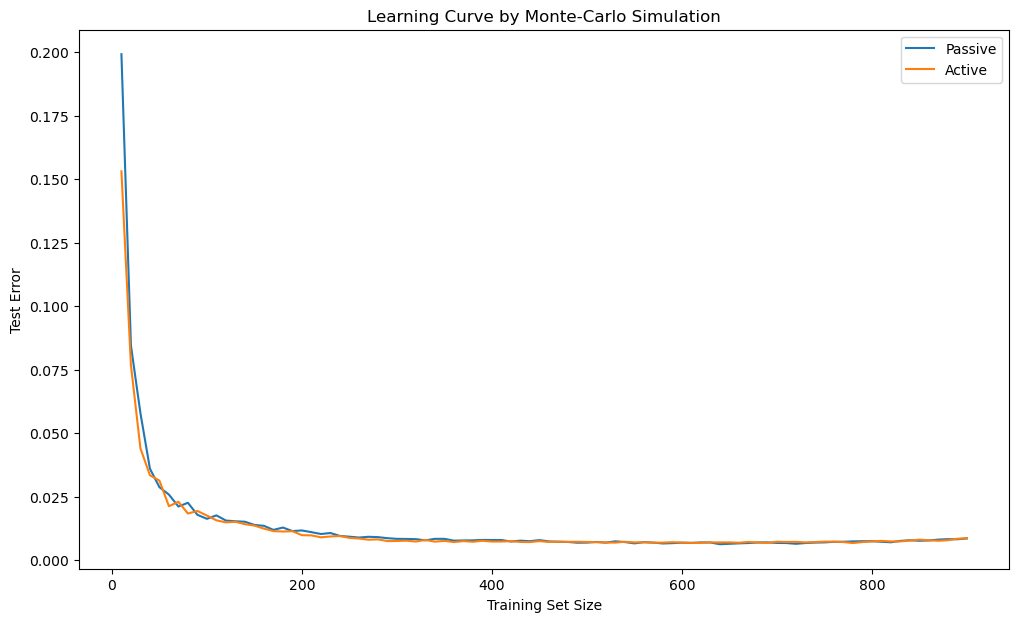

In [55]:
plot_learning_curve(active_learning_curve, passive_learning_curve)